## To-Do
- Train Data
    - Need to replace rows with 3+ in dependents column
    - Need to decide how to clean the null values for all columns
- Test Data
    - Need to replace rows with 3+ in dependents column
    - Need to decide how to clean the null values for all columns


- Create powerpoint slides
    - Not more than 3-4 slides
    - Raw Data -> Data Cleaning / Manipulation (1 slide?)
    - Data Exploration  (1 slide?)
    - ML Model / Constraints (1 slide?)
    - Insights and Conclusion (1 slide?)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
 # Change Loan status from Y & N to 1 & 0
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

#columns with missing cells

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
# Describe the numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [ ]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Loan_Status         -0.809998
dtype: float64

In [ ]:
df.duplicated().any()

# we got no duplicated rows

False

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_ = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

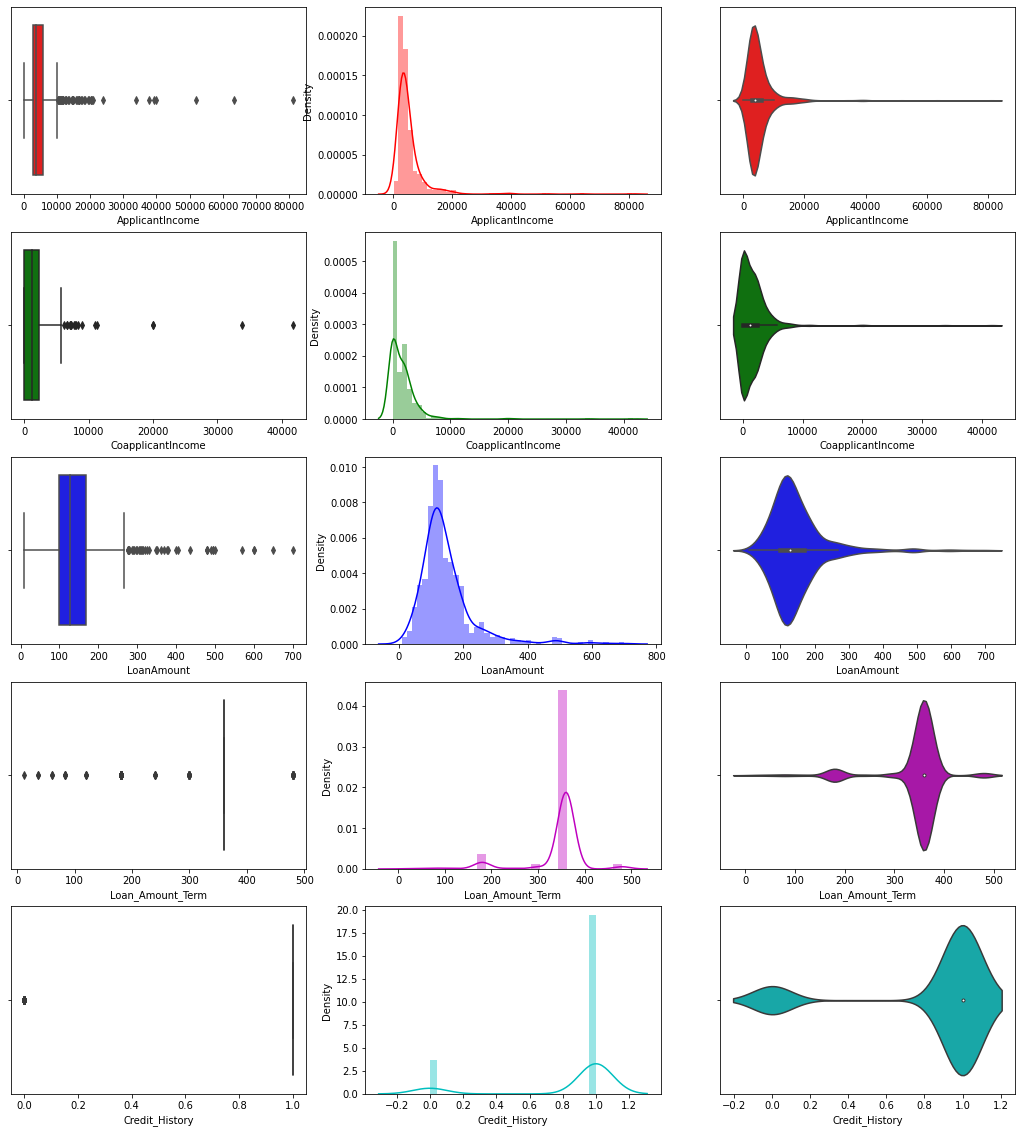

In [ ]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]  # m for magenta, c for cyan

count = 0
# Start of for loop
for var in df_:
    sns.boxplot(df_[var], orient = "h", color = colors[count], ax = axes[count,0])
    sns.distplot(df_[var], color = colors[count], ax = axes[count,1])
    sns.violinplot(df_[var], color = colors[count], ax = axes[count,2])
    count += 1 # same as count = count + 1


plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

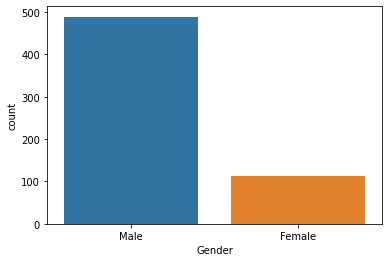

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

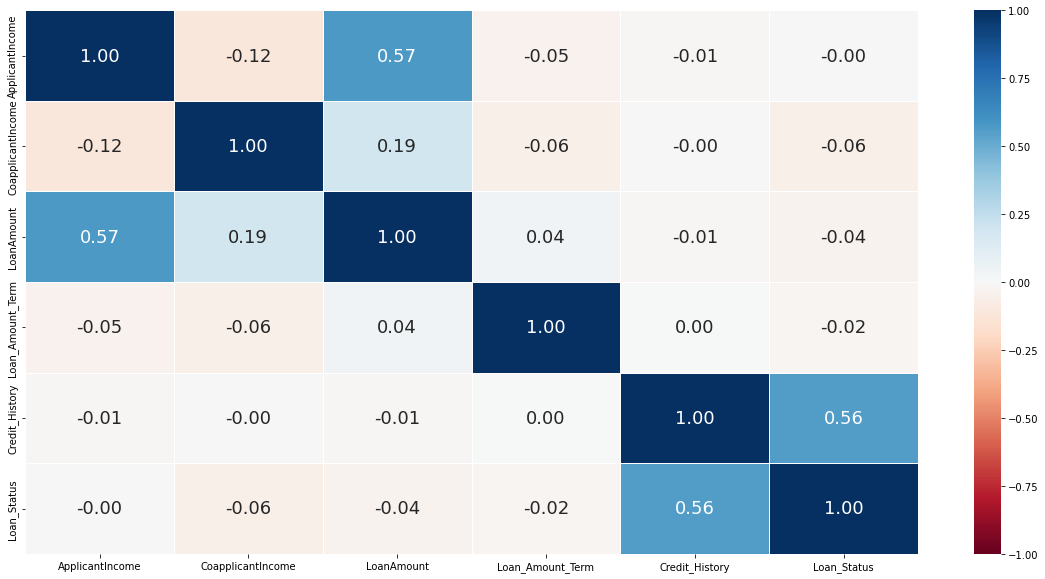

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

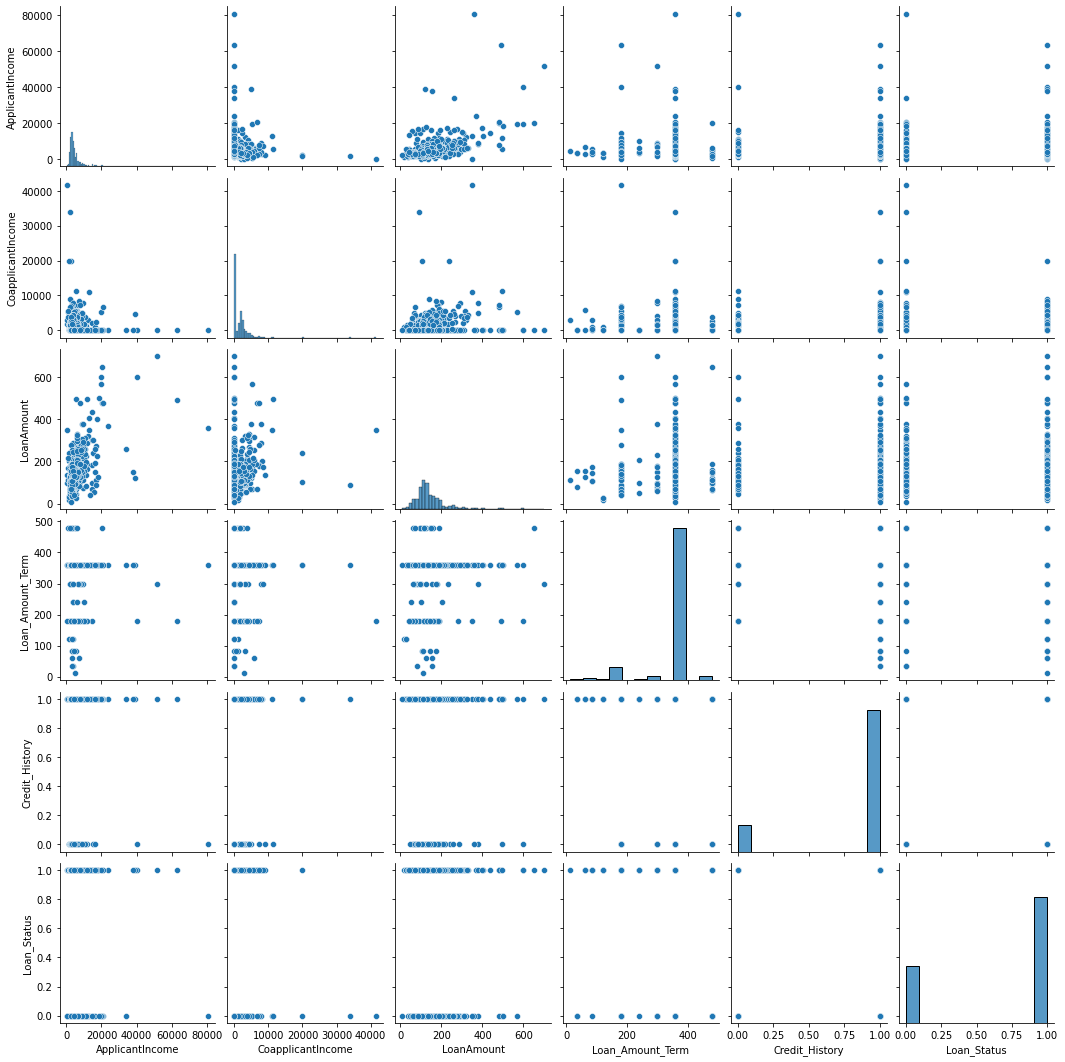

In [ ]:
sns.pairplot(df)

####  Variables that will help us predict whether or not a person will be approved for a loan
- 

In [ ]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural

corr_df = df.corr()
corr_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The percentage of Y class : 0.31
The percentage of N class : 0.69


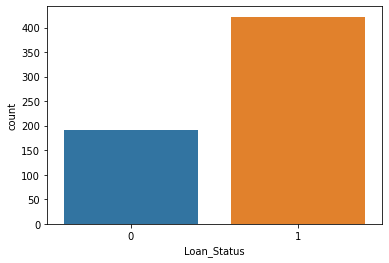

In [ ]:
sns.countplot(df['Loan_Status'])

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

In [ ]:
# for _ ,column in enumerate(df.columns):
#     sns.displot(df[column])

# Data Cleaning and Preprocessing

### Filling NaN Values

In [ ]:
data_train = df.copy()

In [ ]:
# (TRAIN SET) Filling missing rows with most appropriate value (median or mode)
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)

In [ ]:
dummies = pd.get_dummies(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_train = pd.concat([dummies, data_train.drop(['Gender','Married','Education','Self_Employed',\
                        'Dependents','Property_Area',], axis=1)], axis=1)
data_train = data_train.drop('Loan_ID', axis = 1)

In [ ]:
data_train

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,5849,0.0,128.0,360.0,1.0,1
1,0,1,0,1,1,0,1,0,1,0,...,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,0,0,1,0,0,...,1,0,0,0,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,1,0,...,1,0,0,0,2900,0.0,71.0,360.0,1.0,1
610,0,1,0,1,1,0,1,0,1,0,...,0,0,0,1,4106,0.0,40.0,180.0,1.0,1
611,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,8072,240.0,253.0,360.0,1.0,1
612,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,7583,0.0,187.0,360.0,1.0,1


In [ ]:
X = data_train.drop('Loan_Status' , axis = 1)
y = data_train['Loan_Status']

In [ ]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural
corr_train = data_train.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Education_Graduate         0.085884
Married_Yes                0.084281
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education_Not Graduate    -0.085884
Married_No                -0.091478
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

### Applying to Test Data

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data_test = df_test.copy()

In [ ]:
# (TEST SET) Filling missing rows with most appropriate value (median or mode)
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)

In [ ]:
dummies = pd.get_dummies(data_test[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_test = pd.concat([dummies, data_test.drop(['Gender','Married','Education','Self_Employed',\
                        'Dependents','Property_Area',], axis=1)], axis=1)

data_test = data_test.drop('Loan_ID', axis = 1)

data_test

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0
1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,3076,1500,126.0,360.0,1.0
2,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,5000,1800,208.0,360.0,1.0
3,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,2340,2546,100.0,360.0,1.0
4,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,4009,1777,113.0,360.0,1.0
363,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,4158,709,115.0,360.0,1.0
364,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,3250,1993,126.0,360.0,1.0
365,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,5000,2393,158.0,360.0,1.0


# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_cv)}")
print(f"F1 Score: {f1_score(y_cv,pred_cv)}")

Accuracy Score : 0.7675675675675676
F1 Score: 0.8401486988847584


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_cv, pred_cv)


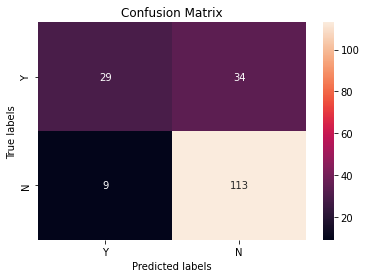

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);

In [ ]:
pred_test = model.predict(data_test)
data_test_logistic_regression = data_test.copy()
data_test_logistic_regression['Loan_Status'] = pred_test
data_test_logistic_regression['Loan_Status'] = data_test_logistic_regression['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_logistic_regression.head() 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,Y


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# x_train, x_rf, y_train, y_rf = train_test_split(X,y, test_size=0.3)

In [ ]:
# forest_x.head()

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions for the test set
pred_rf = forest.predict(x_cv)
print(f"Accuracy Score : {accuracy_score(y_cv,pred_rf)}")
print(f"F1 Score: {f1_score(y_cv,pred_rf)}")

Accuracy Score : 0.8054054054054054
F1 Score: 0.8656716417910448


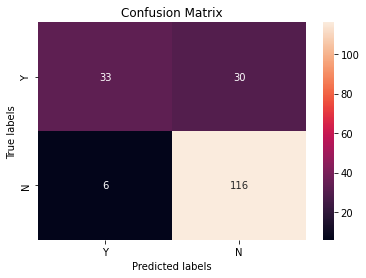

In [ ]:
confusion_matrix_rf = confusion_matrix(y_cv, pred_rf)

ax= plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Y', 'N']); ax.yaxis.set_ticklabels(['Y', 'N']);


In [ ]:
pred_test_rf = forest.predict(data_test)
data_test_random_forest = data_test.copy()
data_test_random_forest['Loan_Status'] = pred_test_rf
data_test_random_forest['Loan_Status'] = data_test_random_forest['Loan_Status'].replace({0: 'N', 1 : 'Y'})
data_test_random_forest.head() 

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,5720,0,110.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,3076,1500,126.0,360.0,1.0,Y
2,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,5000,1800,208.0,360.0,1.0,Y
3,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,2340,2546,100.0,360.0,1.0,Y
4,0,1,1,0,0,1,1,0,0,0,...,1,0,0,0,3276,0,78.0,360.0,1.0,Y


# Pycaret

In [ ]:
import pycaret
from pycaret.classification import *

In [ ]:
df_caert = df.copy()


In [ ]:
df_caert.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
classify = setup(data = df_caert, target = 'Loan_Status')

,Description,Value
0,session_id,1749
1,Target,Loan_Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(614, 13)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8086,0.7248,0.9731,0.8008,0.8774,0.4593,0.5096,0.3160
gbc,Gradient Boosting Classifier,0.8085,0.6980,0.9798,0.7974,0.8782,0.4534,0.5068,0.7610
lda,Linear Discriminant Analysis,0.8039,0.7286,0.9798,0.7931,0.8755,0.4377,0.4940,0.1090
rf,Random Forest Classifier,0.8016,0.7196,0.9698,0.7959,0.8731,0.4380,0.4845,0.3090
lr,Logistic Regression,0.7969,0.7266,0.9598,0.7955,0.8691,0.4341,0.4704,0.1430
ada,Ada Boost Classifier,0.7760,0.6883,0.9230,0.7953,0.8522,0.3944,0.4246,0.1820
nb,Naive Bayes,0.7458,0.7006,0.8798,0.7867,0.8284,0.3365,0.3466,0.0330
lightgbm,Light Gradient Boosting Machine,0.7435,0.7183,0.8563,0.7949,0.8230,0.3558,0.3632,0.0770
dt,Decision Tree Classifier,0.7410,0.6666,0.8562,0.7929,0.8200,0.3493,0.3643,0.0350
dummy,Dummy Classifier,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000,0.0210


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1749, verbose=0,
                     warm_start=False)

In [ ]:
compare_models(n_select = 3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8085,0.6980,0.9798,0.7974,0.8782,0.4534,0.5068,0.2740
et,Extra Trees Classifier,0.8086,0.7248,0.9731,0.8008,0.8774,0.4593,0.5096,0.3050
lda,Linear Discriminant Analysis,0.8039,0.7286,0.9798,0.7931,0.8755,0.4377,0.4940,0.1080
rf,Random Forest Classifier,0.8016,0.7196,0.9698,0.7959,0.8731,0.4380,0.4845,0.3160
lr,Logistic Regression,0.7969,0.7266,0.9598,0.7955,0.8691,0.4341,0.4704,0.1500
ada,Ada Boost Classifier,0.7760,0.6883,0.9230,0.7953,0.8522,0.3944,0.4246,0.1870
nb,Naive Bayes,0.7458,0.7006,0.8798,0.7867,0.8284,0.3365,0.3466,0.0330
lightgbm,Light Gradient Boosting Machine,0.7435,0.7183,0.8563,0.7949,0.8230,0.3558,0.3632,0.0750
dummy,Dummy Classifier,0.6970,0.5000,1.0000,0.6970,0.8214,0.0000,0.0000,0.0200
dt,Decision Tree Classifier,0.7410,0.6666,0.8562,0.7929,0.8200,0.3493,0.3643,0.0350


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1749, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
       

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca6491d5-dcd8-4f08-8e98-375cf39044bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>